In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Simulation 1: compare the conditional shift on X1 and X2 (sigma=1)
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= \beta_1 X_1+\varepsilon_y$$
$$X_2=\beta_2Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The linear regression model is equivariant.

The invariant loss function is $$MSE=\frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$$.



In [2]:
def coef_1(n,sigma,g1,beta):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1
    Y=beta*X1+np.random.normal(0,sigma, n)
    X2=Y+np.random.normal(0, 1, n)
    X=np.hstack([X1.reshape(-1,1)])
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  #fit the linear regression with only X1
    return np.append(reg.coef_,reg.intercept_)

In [3]:
def coef_2(n,sigma,g2,beta):
    X1=np.random.normal(0, sigma, n)
    Y=beta*X1+np.random.normal(0,sigma, n)
    X2=Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X2.reshape(-1,1)]) #fit the linear regression with only X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [4]:
def risk_function1(n,sigma,a,iterate,g1,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n)+a #intervention on X1
        Y=beta*X1+np.random.normal(0,sigma, n)
        #X2=Y+np.random.normal(0, 1, n)
        #X=np.hstack([X1.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_1(n,sigma,g1,beta)[0]+coef_1(n,sigma,g1,beta)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
    return np.append(sum(list0)/(iterate-1),np.std(pred))

In [5]:
def risk_function2(n,sigma,b,iterate,g2,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n) 
        Y=beta*X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)+b #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n,sigma,g2,beta)[0]+coef_2(n,sigma,g2,beta)[1]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n)  
    return np.append(sum(list0)/(iterate-1),np.std(pred))

In [6]:
def predicted_X1(sigma,n,a,iterate,g1,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, 1)+a #intervention on X1
        Y=beta*X1+np.random.normal(0,sigma, 1)
        pred=X1*coef_1(n,sigma,g1,beta)[0]+coef_1(n,sigma,g1,beta)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
    return [Y,pred]

In [7]:
def predicted_X2(sigma,n,b,iterate,g2,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, 1) 
        Y=beta*X1+np.random.normal(0,sigma, 1)
        X2=Y+np.random.normal(0, 1, 1)+b #intervention on X2
        X=np.hstack([X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X2*coef_2(n,sigma,g2,beta)[0]+coef_2(n,sigma,g2,beta)[1]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
    return [Y,pred]

## Scatter plot for checking the distribution: X1 and Y

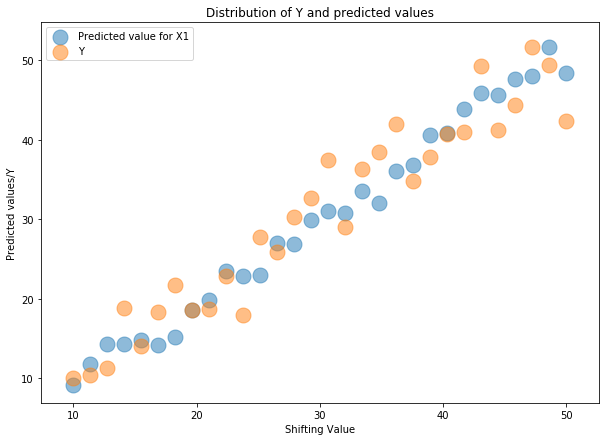

In [8]:
list1a=[]
list1b=[]



for a in np.linspace(10., 50., 30): #different environments on X1
    list1a.append(predicted_X1(1,100,a,11,g1=10,beta=1)[0])
    list1b.append(predicted_X1(1,100,a,11,g1=10,beta=1)[1])
    
   

    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 50., 30), list1a, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 50., 30), list1b, s=area, alpha=0.5)
   
classes = ['Predicted value for X1', 'Y']
plt.legend(labels=classes)
plt.xlabel("Shifting Value")
plt.ylabel("Predicted values/Y")

#plt.legend(loc='best')
plt.title("Distribution of Y and predicted values") 
plt.show() 
plt.show()

## Line plot for checking the distribution: X1 and Y

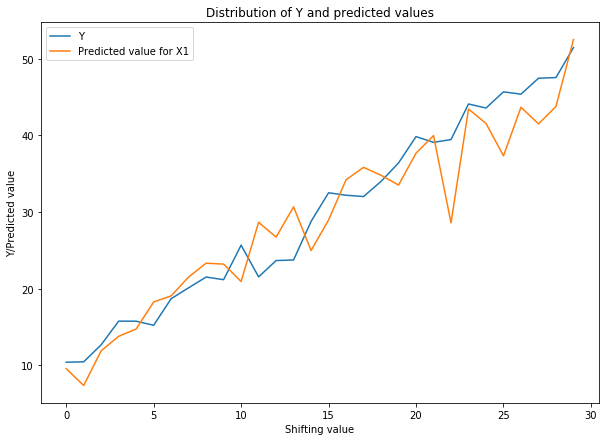

In [9]:
list1a=[]
list1b=[]
list2a=[]
list2b=[]


for a in np.linspace(10., 50., 30): #different environments on X1
    list1a.append(predicted_X1(1,100,a,11,g1=10,beta=1)[0])
    list1b.append(predicted_X1(1,100,a,11,g1=10,beta=1)[1])
    
   

    

plt.figure(figsize=(10,7))


plt.plot(list1a,label='Y')
plt.plot(list1b,label='Predicted value for X1')
plt.xlabel("Shifting value")
plt.ylabel("Y/Predicted value")

plt.legend(loc='best')
plt.title("Distribution of Y and predicted values") 
plt.show()

## Scatter plot for checking the distribution: X2 and Y

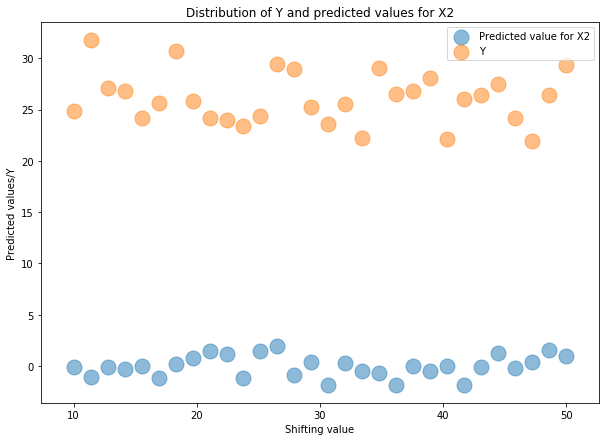

In [10]:
list1a=[]
list1b=[]

for b in np.linspace(10., 20., 30): #different environments on X2
    list1a.append(predicted_X2(1,100,a,11,g2=10,beta=1)[0])
    list1b.append(predicted_X2(1,100,a,11,g2=10,beta=1)[1])

      

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 50., 30), list1a, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 50., 30), list1b, s=area, alpha=0.5)
   
classes = ['Predicted value for X2', 'Y']
plt.legend(labels=classes)
plt.xlabel("Shifting value")
plt.ylabel("Predicted values/Y")

#plt.legend(loc='best')
plt.title("Distribution of Y and predicted values for X2") 
plt.show() 
plt.show()

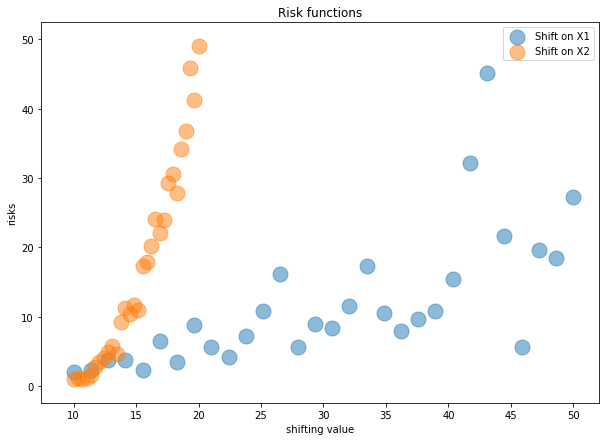

In [11]:
list1=[]
list2=[]


for a in np.linspace(10., 50., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[0])
    
   
for b in np.linspace(10., 20., 30): #different environments on X2
    list2.append(risk_function2(100,1,b, 11,g2=10,beta=1)[0])
    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 50., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
   
classes = ['Shift on X1', 'Shift on X2']
plt.legend(labels=classes)
plt.xlabel("shifting value")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 
plt.show()

### Standard error plot

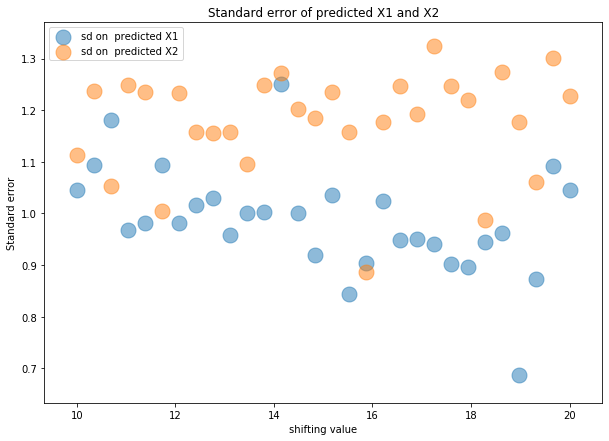

In [12]:
list1=[]
list2=[]



for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[1])
    
   
for b in np.linspace(10., 20., 30): #different environments on X2
    list2.append(risk_function2(100,1,b, 11,g2=10,beta=1)[1])
    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
   
classes = ['sd on  predicted X1', 'sd on  predicted X2']
plt.legend(labels=classes)
plt.xlabel("shifting value")
plt.ylabel("Standard error")

#plt.legend(loc='best')
plt.title("Standard error of predicted X1 and X2") 
plt.show()

## Simulation 2: compare the conditional shift on X1 and that on X1 and X2

In [13]:
def coef_X12(n,sigma,g1,g2,beta):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1(for X1)
    Y=beta*X1+np.random.normal(0,sigma, n)
    X2=Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)]) #fit the linear regression with X1 and X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [14]:
def risk_function_X12(n,sigma,x,iterate,g1,g2,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n)+x[0] #intervention on X1
        Y=beta*X1+np.random.normal(0,sigma, n)
        X2=Y+np.random.normal(0, 1, n)+x[1] #intervention on X2
        X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_X12(n,sigma,g1,g2,beta)[0]+X2*coef_X12(n,sigma,g1,g2,beta)[1]+coef_X12(n,sigma,g1,g2,beta)[2]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
    return sum(list0)/(iterate-1)


### Scatter plot: g1=g2=np.linspace(10., 20., 30)

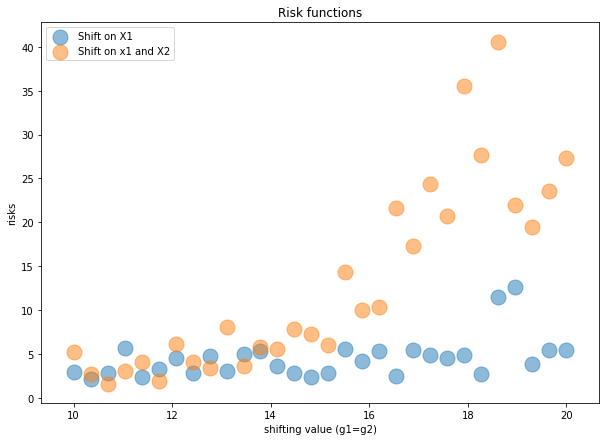

In [30]:
list1=[]
list2=[]
a=np.linspace(10., 20., 30)
b=np.linspace(10., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[0])
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12(100,1,m[i],11,g1=10,g2=10,beta=1))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1', 'Shift on x1 and X2']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 


### Scatter plot: g1=np.linspace(10., 50., 30), g2=np.linspace(1., 10., 30)

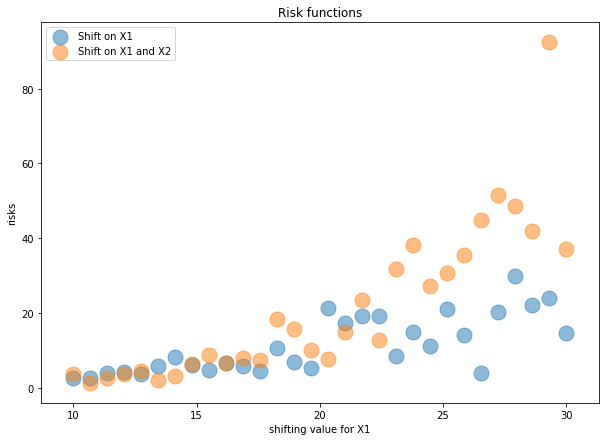

In [29]:
list1=[]
list2=[]
a=np.linspace(10., 50., 30)
b=np.linspace(1., 10., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


for a in np.linspace(10., 50., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[0])
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12(100,1,m[i],11,g1=10,g2=1,beta=1))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 30., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 30., 30), list2, s=area, alpha=0.5)
   
classes = ['Shift on X1', 'Shift on X1 and X2']
plt.legend(labels=classes)
plt.xlabel("shifting value for X1")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 
plt.show()


## Simulation 3: compare the conditional shift on X1 and that on X1 , Y and X2
#### g1=g2=g3=np.linspace(10., 20., 30)

In [17]:
def coef_X12Y(n,sigma,g1,g2,g3,beta):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1(for X1)
    Y=beta*X1+np.random.normal(0,sigma, n)+g3 #intervention on Y in environment 1(for Y)
    X2=Y+np.random.normal(0, 1, n)+g2 #intervention on X2 in environment 1(for X2)
    X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)]) #fit the linear regression with X1 and X2
    y=np.hstack([Y.reshape(-1,1)])
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [18]:
def risk_function_X12Y(n,sigma,x,iterate,g1,g2,g3,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n)+x[0] #intervention on X1
        Y=beta*X1+np.random.normal(0,sigma, n)+x[2]
        X2=Y+np.random.normal(0, 1, n)+x[1] #intervention on X2
        X=np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])
        #y=np.hstack([Y.reshape(-1,1)])
        pred=X1*coef_X12Y(n,sigma,g1,g2,g3,beta)[0]+X2*coef_X12Y(n,sigma,g1,g2,g3,beta)[1]+coef_X12Y(n,sigma,g1,g2,g3,beta)[2]  #use the coefficients and intercept in envronment 1 for X2 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
    return sum(list0)/(iterate-1)

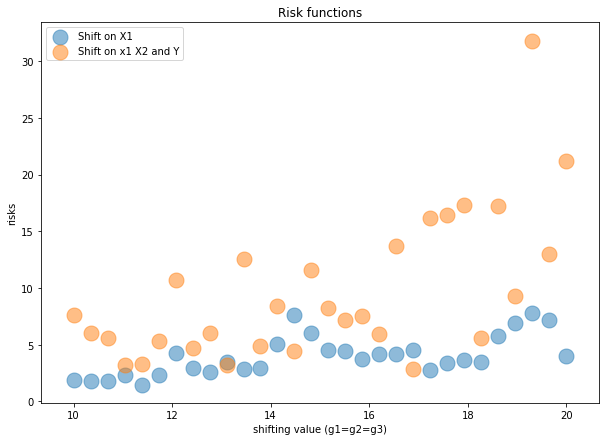

In [19]:
list1=[]
list2=[]
a=np.linspace(10., 20., 30)
b=np.linspace(10., 20., 30)
c=np.linspace(10., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1), c.reshape(-1,1)])


for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[0])
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12Y(100,1,m[i],11,g1=10,g2=10,g3=10,beta=1))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1', 'Shift on x1 X2 and Y']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2=g3)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 

## Simulation 4: compare the conditional shift on X1 and Y, and the conditional shift on X1 , Y and X2
#### g1=g2=g3=np.linspace(10., 20., 30)

In [31]:
def coef_X1Y(n,sigma,g1,g3,beta):
    X1=np.random.normal(0, sigma, n)+g1 #intervention on X1 in environment 1(for X1)
    Y=beta*X1+np.random.normal(0,sigma, n)+g3 #intervention on Y in environment 1(for Y)
    y=np.hstack([Y.reshape(-1,1)])
    X=X1.reshape(-1,1)
    reg=LinearRegression().fit(X, y)  
    return np.append(reg.coef_,reg.intercept_)

In [32]:
def risk_function_X1Y(n,sigma,x,iterate,g1,g3,beta):
    list0=[]
    for i in range(1,iterate):
        X1=np.random.normal(0, sigma, n)+x[0] #intervention on X1
        Y=beta*X1+np.random.normal(0,sigma, n)+x[1]#intervention on Y
        pred=X1*coef_X1Y(n,sigma,g1,g3,beta)[0]+coef_X1Y(n,sigma,g1,g3,beta)[1] #use the coefficients and intercept in envronment 1 for X1 to make prediction
        list0.append(sum((Y-pred)**2)/n) 
    return sum(list0)/(iterate-1)

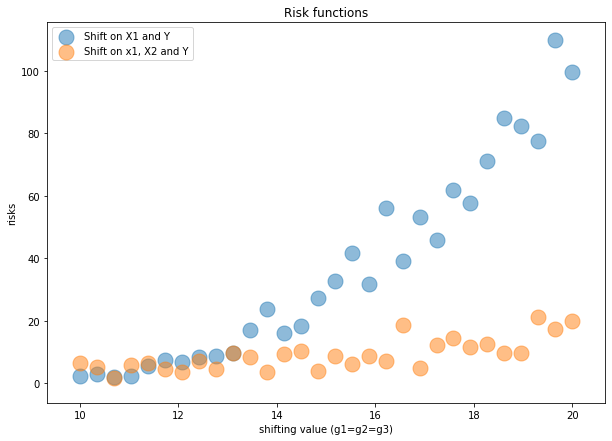

In [33]:
list1=[]
list2=[]
a=np.linspace(10., 20., 30)
b=np.linspace(10., 20., 30)
c=np.linspace(10., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])
n=np.hstack([a.reshape(-1,1),b.reshape(-1,1), c.reshape(-1,1)])

for i in range(30): #different environments on X1
    list1.append(risk_function_X1Y(100,1,m[i],11,g1=a[0],g3=c[0],beta=1))
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12Y(100,1,n[i],11,g1=a[0],g2=b[0],g3=c[0],beta=1))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1 and Y', 'Shift on x1, X2 and Y']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2=g3)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 

## Scatter plots with $\beta$=3

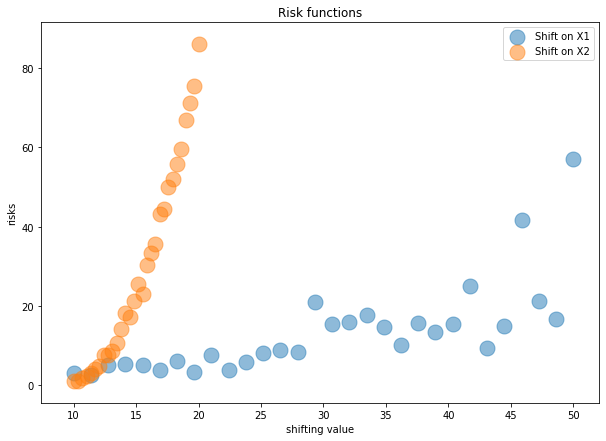

In [34]:
list1=[]
list2=[]


for a in np.linspace(10., 50., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=3)[0])
    
   
for b in np.linspace(10., 20., 30): #different environments on X2
    list2.append(risk_function2(100,1,b, 11,g2=10,beta=3)[0])
    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 50., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
   
classes = ['Shift on X1', 'Shift on X2']
plt.legend(labels=classes)
plt.xlabel("shifting value")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 
plt.show()

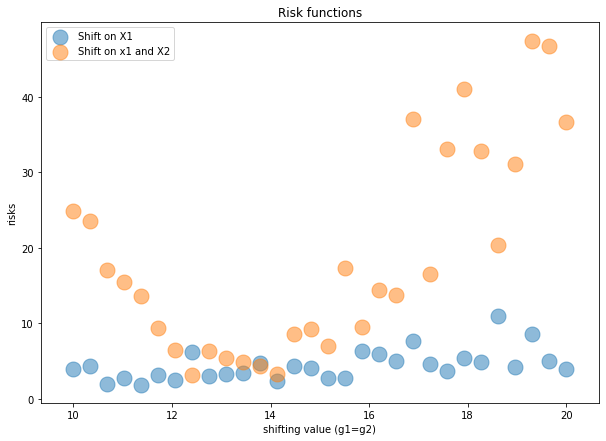

In [35]:
list1=[]
list2=[]
a=np.linspace(1., 20., 30)
b=np.linspace(1., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])


for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=3)[0])
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12(100,1,m[i],11,g1=10,g2=10,beta=3))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1', 'Shift on x1 and X2']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 

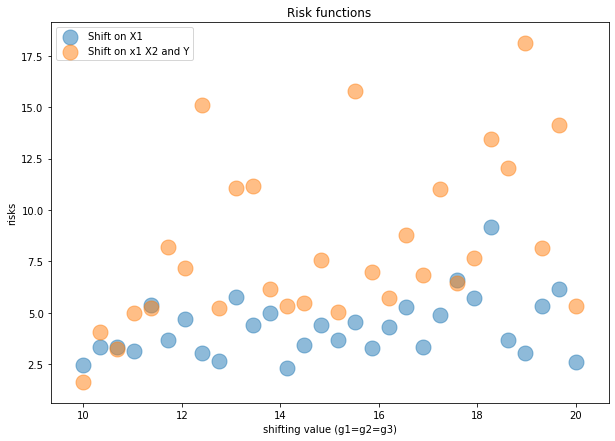

In [36]:
list1=[]
list2=[]
a=np.linspace(10., 20., 30)
b=np.linspace(10., 20., 30)
c=np.linspace(10., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1), c.reshape(-1,1)])


for a in np.linspace(10., 20., 30): #different environments on X1
    list1.append(risk_function1(100,1,a, 11,g1=10,beta=1)[0])
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12Y(100,1,m[i],11,g1=10,g2=10,g3=10,beta=1))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1', 'Shift on x1 X2 and Y']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2=g3)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 

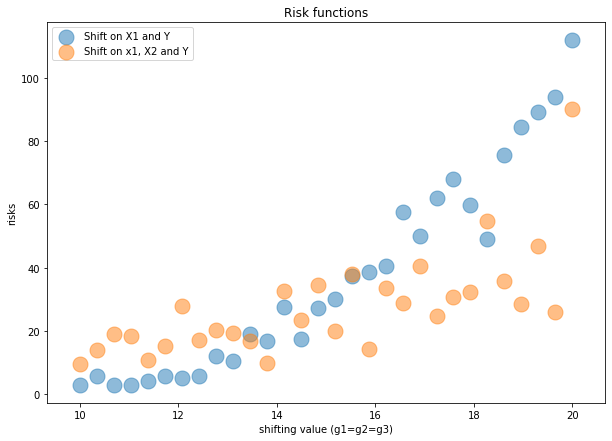

In [38]:
list1=[]
list2=[]
a=np.linspace(10., 20., 30)
b=np.linspace(10., 20., 30)
c=np.linspace(10., 20., 30)
m=np.hstack([a.reshape(-1,1),b.reshape(-1,1)])
n=np.hstack([a.reshape(-1,1),b.reshape(-1,1), c.reshape(-1,1)])

for i in range(30): #different environments on X1
    list1.append(risk_function_X1Y(100,1,m[i],11,g1=a[0],g3=c[0],beta=3))
    
   
   
for i in range(30): #different environments on X2
    list2.append(risk_function_X12Y(100,1,n[i],11,g1=a[0],g2=b[0],g3=c[0],beta=3))


    

plt.figure(figsize=(10,7))

N = 30

colors = np.random.rand(N)
area = (30 * 0.5)**2 
plt.scatter(np.linspace(10., 20., 30), list1, s=area, alpha=0.5)
plt.scatter(np.linspace(10., 20., 30), list2, s=area, alpha=0.5)
classes = ['Shift on X1 and Y', 'Shift on x1, X2 and Y']
plt.legend(labels=classes)
plt.xlabel("shifting value (g1=g2=g3)")
plt.ylabel("risks")

#plt.legend(loc='best')
plt.title("Risk functions") 
plt.show() 